# Primary Skill Demand Analysis for Top Three European Data Roles 2023: A Deep Dive

This analysis examines the key technical and domain-specific skills demanded in European data job postings for the top three roles. We break down the skill distribution in raw counts and as percentages to provide a comprehensive view of what employers are looking for in Data Analysts, Data Engineers, and Data Scientists.

## Chapter 1: Environment Setup and Data Acquisition

In this chapter, we import the necessary libraries and load the dataset containing European data job listings.

In [1]:
from helper_scripts.prepare_dataframe import get_european_dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration: parameters for filtering and visualization
TOP_JOB_ROLES = 3  # Number of top job roles to be considered
TOP_SKILLS = 5  # Number of top skills per job role to display
COUNT_X_LIMIT = 41000  # X-axis limit for skill count plots
PERCENT_X_LIMIT = 70  # X-axis limit for percentage plots

# Load the European job market dataset
europe_jobs_df = get_european_dataframe()

*This chapter sets up our analysis environment and loads the data required to evaluate skill demand across roles.*

## Chapter 2: Data Preprocessing and Skill Extraction

Here, we transform the dataset by exploding the list of skills into individual entries. This allows for a detailed analysis of the frequency at which each skill appears per job role.

In [2]:
# Explode the 'job_skills' column to handle individual skills
skills_exploded_df = europe_jobs_df.explode("job_skills")

# Group by job role and skill to calculate the frequency of each skill per role
skills_count_df = (
    skills_exploded_df.groupby(["job_skills", "job_title_short"])
    .size()
    .reset_index(name="skill_count")
)
skills_count_df.sort_values(by="skill_count", ascending=False, inplace=True)

# Identify the top roles in focus (using the first TOP_JOB_ROLES found)
top_roles = sorted(skills_count_df["job_title_short"].unique().tolist()[:TOP_JOB_ROLES])

*By preprocessing the skills data this way, we can accurately assess how often each skill is requested across job titles.*

## Chapter 3: Visualizing Skill Demand in Counts

This chapter presents the raw counts of requested skills per top data role through bar charts. It provides a direct look at the prevalence of specific skills.

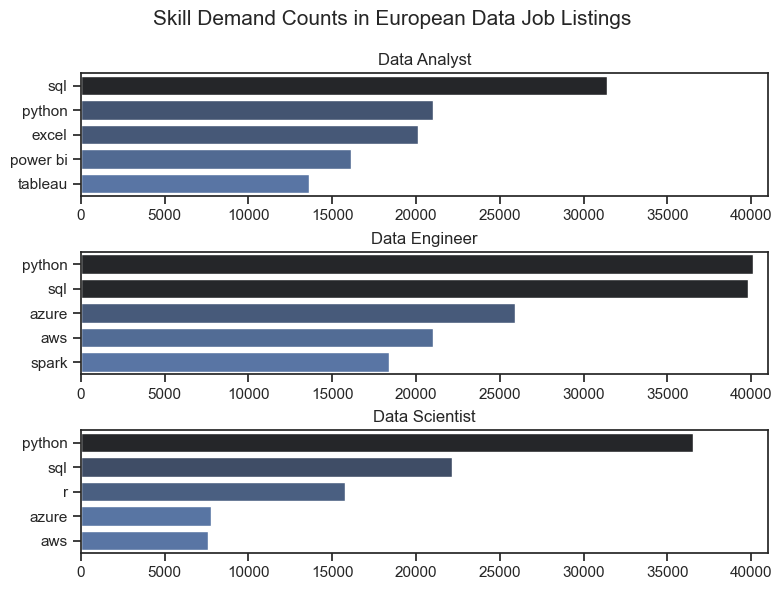

In [7]:
fig, ax = plt.subplots(len(top_roles), 1, figsize=(8, 2 * len(top_roles)))
sns.set_theme(style="ticks")

for i, role in enumerate(top_roles):
    # For each role, select the top TOP_SKILLS skills by count
    role_skills = skills_count_df[skills_count_df["job_title_short"] == role].head(
        TOP_SKILLS
    )

    sns.barplot(
        data=role_skills,
        x="skill_count",
        y="job_skills",
        ax=ax[i],
        hue="skill_count",
        palette="dark:b_r",
        legend=False,
    )
    ax[i].set_title(role)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].set_xlim(0, COUNT_X_LIMIT)

fig.suptitle("Skill Demand Counts in European Data Job Listings", fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()

*This visualization reveals which skills are most frequently required—and by implication—the primary competencies for the role.*

## Chapter 4: Converting Skill Counts to Percentage Values

To normalize our analysis relative to the total number of postings per role, we convert raw skill counts into percentages. This provides insight into the relative importance of each skill.

In [4]:
# Calculate total job postings per role for percentage conversion
job_counts_df = (
    europe_jobs_df["job_title_short"].value_counts().reset_index(name="jobs_total")
)
job_counts_df.rename(columns={"index": "job_title_short"}, inplace=True)

# Merge the skill count dataframe with overall job counts
skills_perc_df = pd.merge(
    skills_count_df, job_counts_df, on="job_title_short", how="left"
)
skills_perc_df["skill_percent"] = (
    skills_perc_df["skill_count"] / skills_perc_df["jobs_total"]
) * 100

*Normalizing skill counts helps benchmark how prevalent a specific skill is within every relevant job posting.*

## Chapter 5: Visualizing Skill Demand as Percentages

This chapter shows how likely it is, in percentage terms, for a particular skill to appear in a job posting for each top role. These bar charts include annotations for clarity.

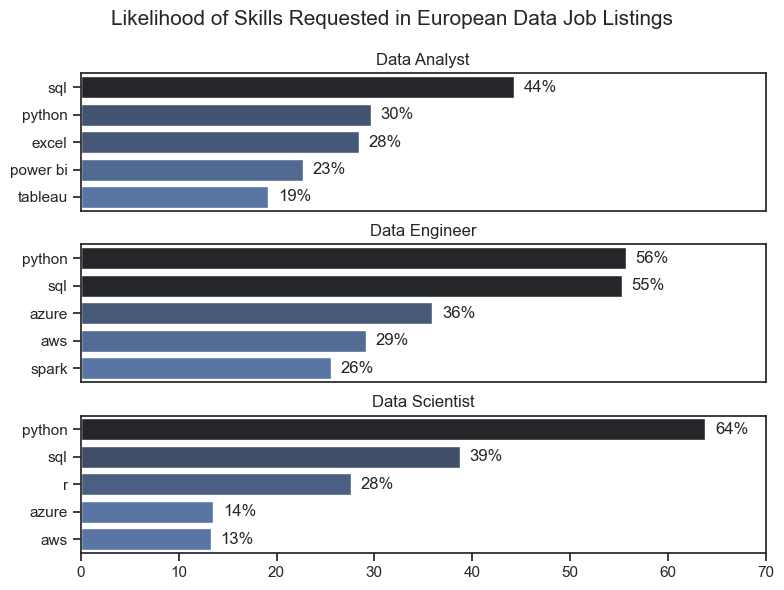

In [5]:
fig, ax = plt.subplots(len(top_roles), 1, figsize=(8, 2 * len(top_roles)))
sns.set_theme(style="ticks")

for i, role in enumerate(top_roles):
    # Retrieve the top skills for the role (converted to percentage)
    role_data = skills_perc_df[skills_perc_df["job_title_short"] == role].head(
        TOP_SKILLS
    )

    sns.barplot(
        data=role_data,
        x="skill_percent",
        y="job_skills",
        ax=ax[i],
        hue="skill_count",
        palette="dark:b_r",
        dodge=False,
    )
    ax[i].set_title(role)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, PERCENT_X_LIMIT)

    # Remove x-ticks on all but the last subplot for a cleaner layout
    if i != len(top_roles) - 1:
        ax[i].set_xticks([])

    # Annotate each bar with its percentage value
    for idx, percent in enumerate(role_data["skill_percent"]):
        ax[i].text(percent + 1, idx, f"{percent:.0f}%", va="center")

fig.suptitle(
    "Likelihood of Skills Requested in European Data Job Listings", fontsize=15
)
fig.tight_layout(h_pad=0.8)
plt.show()

*The percentage-based visualizations allow us to evaluate the likelihood of a skill being requested relative to the overall postings in each role.*

## Chapter 6: Insights from the Skills Analysis

Below are the key insights drawn from the skill demand data, categorized by role:

### Data Analyst
- **SQL leads the pack:** Nearly 44% of data analyst postings require SQL, establishing it as the foremost skill.  
- **Python and Excel remain essential:** With roughly 29% of postings each, these skills underscore the need for programming proficiency and spreadsheet expertise.  
- **Visualization tools are prized:** Tools like Power BI (23%) and Tableau (19%) are crucial for effectively conveying data insights.

### Data Engineer
- **Python and SQL are fundamental:** Each appears in over 55% of job postings, indicating that a combination of programming and database management is indispensable.  
- **Cloud platform expertise matters:** Knowledge of Azure (36%) and AWS (29%) is increasingly valued, highlighting the shift toward cloud-based data infrastructure.  
- **Big data frameworks are significant:** Approximately 26% of postings mention Spark, emphasizing the importance of big data processing skills.

### Data Scientist
- **Python dominates:** Appearing in nearly 64% of job postings, Python stands out as the primary language for data science tasks.  
- **SQL remains a critical skill:** Required in almost 39% of postings, SQL is essential for efficient data querying.  
- **Additional competencies:** R is present in around 28% of roles, while basic cloud platform know-how (Azure and AWS at roughly 13% each) is considered a supplementary, though valuable, skill.

*These insights provide a clear picture of what technical capabilities are sought after in different data roles—helping professionals align their skills with market demands.*

## Final Remarks

This notebook has mapped the primary skills demanded in European job listings for the top three data roles, presenting both raw counts and normalized (percentage) insights. Understanding these trends is vital for career planning and curriculum development in data science, analytics, and engineering.